In [1]:
!pip install tensorflow==2.12.0
!pip install tensorflow-addons==0.19.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 90.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 96.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting un

In [2]:
import zipfile

In [3]:
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shutil
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
import tensorflow_addons as tfa

/opt/conda/lib/python3.10/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.12.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


Try 3

In [5]:
!pip install gdown

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [6]:
!gdown "https://drive.google.com/uc?id=1QAkYNXInCNX35b2lI8dXHFvVjor9AIVk"


Downloading...
From (original): https://drive.google.com/uc?id=1QAkYNXInCNX35b2lI8dXHFvVjor9AIVk
From (redirected): https://drive.google.com/uc?id=1QAkYNXInCNX35b2lI8dXHFvVjor9AIVk&confirm=t&uuid=2abea9cb-e9c7-47bf-b967-41abe5997c79
To: /kaggle/working/Copy of Copy of train.zip
100%|████████████████████████████████████████| 124M/124M [00:03<00:00, 31.4MB/s]


In [7]:
zip_path = "/kaggle/working/Copy of Copy of train.zip"  # Path to the ZIP file
extracted_path = "/kaggle/working/chest_ctscan_images"  # Path to extract the files
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

In [8]:
train_dir = os.path.join(extracted_path, "train")
valid_dir = "/kaggle/working/chest_ctscan_images/valid"
test_dir = "/kaggle/working/chest_ctscan_images/test"

In [9]:
# Create a validation set from a portion of the training set
def create_validation_set(source_dir, validation_dir, validation_ratio=0.2):
    if not os.path.exists(validation_dir):
        os.makedirs(validation_dir)

    for class_name in os.listdir(source_dir):
        class_source_path = os.path.join(source_dir, class_name)
        class_valid_path = os.path.join(validation_dir, class_name)

        if not os.path.exists(class_valid_path):
            os.makedirs(class_valid_path)

        all_files = os.listdir(class_source_path)
        train_files, valid_files = train_test_split(all_files, test_size=validation_ratio, random_state=42)

        for file in valid_files:
            shutil.move(os.path.join(class_source_path, file), os.path.join(class_valid_path, file))

create_validation_set(train_dir, valid_dir, validation_ratio=0.2)  # Split 20% for validation

In [10]:
# Example code to create a test set from a portion of the training set
def create_test_set(source_dir, test_dir, test_ratio=0.1):
    # Create test directory if it doesn't exist
    if not os.path.exists(test_dir):
        os.makedirs(test_dir)

    for class_name in os.listdir(source_dir):
        class_source_path = os.path.join(source_dir, class_name)
        class_test_path = os.path.join(test_dir, class_name)

        if not os.path.exists(class_test_path):
            os.makedirs(class_test_path)

        all_files = os.listdir(class_source_path)
        train_files, test_files = train_test_split(all_files, test_size=test_ratio, random_state=42)

        for file in test_files:
            shutil.move(os.path.join(class_source_path, file), os.path.join(class_test_path, file))

create_test_set(train_dir, test_dir, test_ratio=0.18)  # Split 10% for test

In [11]:
train_datagen = ImageDataGenerator(
    # rescale=1.0/255,
    # rotation_range=20,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    # zoom_range=0.2,
    # horizontal_flip=True
)

In [12]:
valid_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

In [13]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=6,
    class_mode='categorical'
)

Found 654 images belonging to 4 classes.


In [14]:
validation_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224,224),
    batch_size=6,
    class_mode='categorical'
)

Found 201 images belonging to 4 classes.


In [15]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=6,
    class_mode='categorical'
)

Found 145 images belonging to 4 classes.


In [16]:
os.makedirs(test_dir, exist_ok=True)

In [17]:
# Example to list files in the test directory
test_files = os.listdir(test_dir)
print("Number of files in test directory:", len(test_files))

Number of files in test directory: 4


In [18]:
print("Test directory:", test_dir)

Test directory: /kaggle/working/chest_ctscan_images/test


In [19]:
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1_val

In [20]:
METRICS = [
    tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.AUC(name='auc'),
    tfa.metrics.F1Score(num_classes=4, average="micro", name='f1_score')
]

In [21]:
base_model = tf.keras.applications.ConvNeXtTiny(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)

111650432/111650432 [==============================] - 3s 0us/step


In [22]:
total_layers = len(base_model.layers)

In [23]:
num_layers_to_freeze = 0

In [24]:
for layer in base_model.layers[:num_layers_to_freeze]:
    layer.trainable = True

In [25]:
for i, layer in enumerate(base_model.layers):
    print(f"Layer {i}: {layer.name}, Trainable: {layer.trainable}")

Layer 0: input_1, Trainable: True
Layer 1: convnext_tiny_prestem_normalization, Trainable: True
Layer 2: convnext_tiny_stem, Trainable: True
Layer 3: convnext_tiny_stage_0_block_0_depthwise_conv, Trainable: True
Layer 4: convnext_tiny_stage_0_block_0_layernorm, Trainable: True
Layer 5: convnext_tiny_stage_0_block_0_pointwise_conv_1, Trainable: True
Layer 6: convnext_tiny_stage_0_block_0_gelu, Trainable: True
Layer 7: convnext_tiny_stage_0_block_0_pointwise_conv_2, Trainable: True
Layer 8: convnext_tiny_stage_0_block_0_layer_scale, Trainable: True
Layer 9: convnext_tiny_stage_0_block_0_identity, Trainable: True
Layer 10: tf.__operators__.add, Trainable: True
Layer 11: convnext_tiny_stage_0_block_1_depthwise_conv, Trainable: True
Layer 12: convnext_tiny_stage_0_block_1_layernorm, Trainable: True
Layer 13: convnext_tiny_stage_0_block_1_pointwise_conv_1, Trainable: True
Layer 14: convnext_tiny_stage_0_block_1_gelu, Trainable: True
Layer 15: convnext_tiny_stage_0_block_1_pointwise_conv_2, T

In [26]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(4, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convnext_tiny (Functional)  (None, 7, 7, 768)         27820128  
                                                                 
 global_average_pooling2d (G  (None, 768)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 4)                 3076      
                                                                 
Total params: 27,823,204
Trainable params: 27,823,204
Non-trainable params: 0
_________________________________________________________________


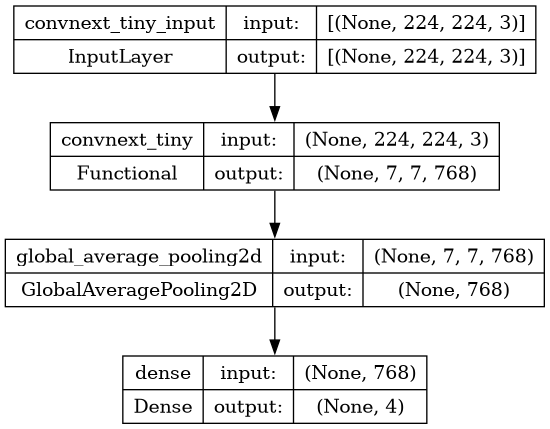

In [27]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png')

In [28]:
model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=0.0005),
    metrics=METRICS
)

In [29]:
callbacks = [
    ModelCheckpoint("best_model.keras", monitor="val_accuracy", save_best_only=True, verbose=1),
     EarlyStopping(monitor="val_loss", patience=5, verbose=1, restore_best_weights=True)
]

In [30]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=35,
    callbacks=callbacks,
        verbose=1
    #  , class_weight=class_weights
)

Epoch 1/35
109/109 [==============================] - ETA: 0s - loss: 1.0150 - accuracy: 0.5138 - precision: 0.6234 - recall: 0.3823 - auc: 0.8022 - f1_score: 0.5138 
Epoch 1: val_accuracy improved from -inf to 0.58706, saving model to best_model.keras
109/109 [==============================] - 2266s 21s/step - loss: 1.0150 - accuracy: 0.5138 - precision: 0.6234 - recall: 0.3823 - auc: 0.8022 - f1_score: 0.5138 - val_loss: 0.8618 - val_accuracy: 0.5871 - val_precision: 0.9298 - val_recall: 0.2637 - val_auc: 0.8351 - val_f1_score: 0.5871
Epoch 2/35
109/109 [==============================] - ETA: 0s - loss: 0.7307 - accuracy: 0.6728 - precision: 0.7346 - recall: 0.5841 - auc: 0.9039 - f1_score: 0.6728 
Epoch 2: val_accuracy improved from 0.58706 to 0.66667, saving model to best_model.keras
109/109 [==============================] - 2225s 20s/step - loss: 0.7307 - accuracy: 0.6728 - precision: 0.7346 - recall: 0.5841 - auc: 0.9039 - f1_score: 0.6728 - val_loss: 0.6878 - val_accuracy: 0.66

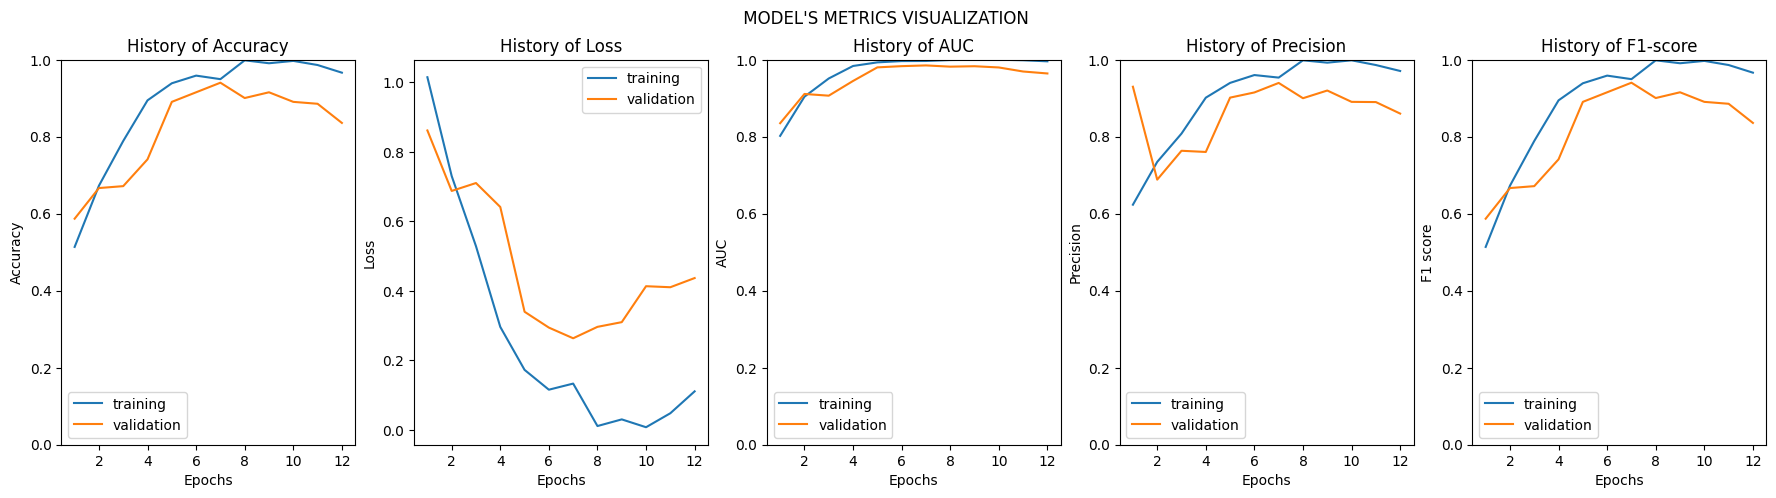

In [31]:
def Train_Val_Plot(acc, val_acc, loss, val_loss, auc, val_auc, precision, val_precision, f1, val_f1):

    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(22, 5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    # Rescale the y-axis for accuracy, auc, precision, and f1
    rescale_factor = 0  # Adjust this factor to control the rescaling

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.set_ylim([0, 1.0])
    ax1.legend(['training', 'validation'])

    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])

    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.set_ylim([rescale_factor, 1.0])
    ax3.legend(['training', 'validation'])

    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('History of Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.set_ylim([rescale_factor, 1.0])
    ax4.legend(['training', 'validation'])

    ax5.plot(range(1, len(f1) + 1), f1)
    ax5.plot(range(1, len(val_f1) + 1), val_f1)
    ax5.set_title('History of F1-score')
    ax5.set_xlabel('Epochs')
    ax5.set_ylabel('F1 score')
    ax5.set_ylim([rescale_factor, 1.0])
    ax5.legend(['training', 'validation'])

    plt.show()

# Example usage:
Train_Val_Plot(history.history['accuracy'], history.history['val_accuracy'],
               history.history['loss'], history.history['val_loss']
               ,
               history.history['auc'], history.history['val_auc'],
               history.history['precision'], history.history['val_precision'],
               history.history['f1_score'], history.history['val_f1_score'])

In [32]:
model.evaluate(test_generator)

25/25 [==============================] - 153s 6s/step - loss: 0.2044 - accuracy: 0.9379 - precision: 0.9379 - recall: 0.9379 - auc: 0.9911 - f1_score: 0.9379


[0.20436657965183258,
 0.9379310607910156,
 0.9379310607910156,
 0.9379310607910156,
 0.9911454319953918,
 0.9379310607910156]

In [33]:
# Load the test dataset
X_test, y_test = [], []
for i in range(len(validation_generator)):
    batch_X, batch_y = validation_generator[i]
    X_test.append(batch_X)
    y_test.append(batch_y)
X_test = np.concatenate(X_test)
y_test = np.concatenate(y_test)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert the one-hot encoded predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert the one-hot encoded true labels to class labels
y_true_classes = np.argmax(y_test, axis=1)

# Create a classification report
report = classification_report(y_true_classes, y_pred_classes)

print(report)

7/7 [==============================] - 177s 25s/step
              precision    recall  f1-score   support

           0       0.90      0.97      0.94        68
           1       0.90      0.95      0.92        38
           2       1.00      0.98      0.99        43
           3       0.98      0.87      0.92        52

    accuracy                           0.94       201
   macro avg       0.95      0.94      0.94       201
weighted avg       0.94      0.94      0.94       201



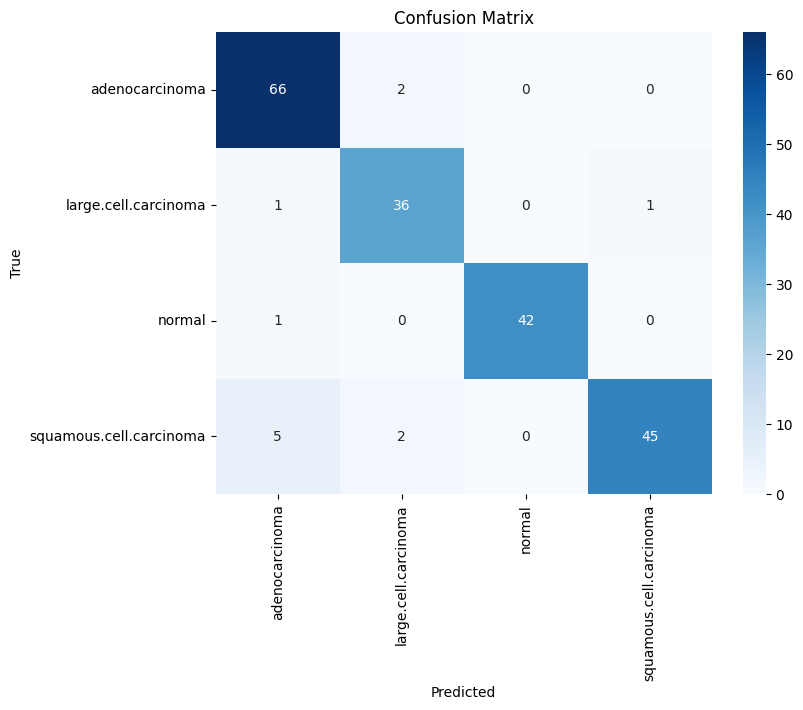

In [34]:
class_names = ['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()